/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

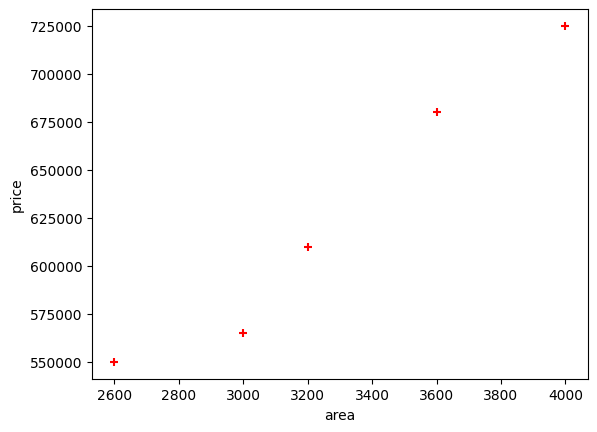

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

print(reg.predict([[3000, 3, 40]]))

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

[498408.25158031]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

[41288.69409442]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


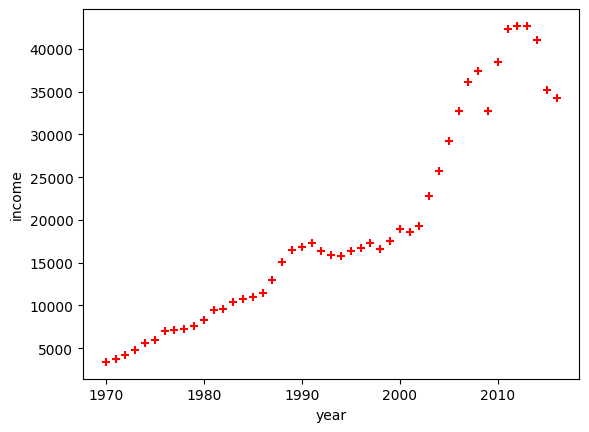

In [35]:
##CANADA PER CAPITA

import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

df = pd.read_csv('canada_per_capita_income1.csv')
df.income.median()
df.income = df.income.fillna(df.income.median())
df

plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income,color='red',marker='+')

reg = linear_model.LinearRegression()
reg.fit(df[['year']],df.income)

print(reg.predict([[2020]]))


[139574.04095966]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


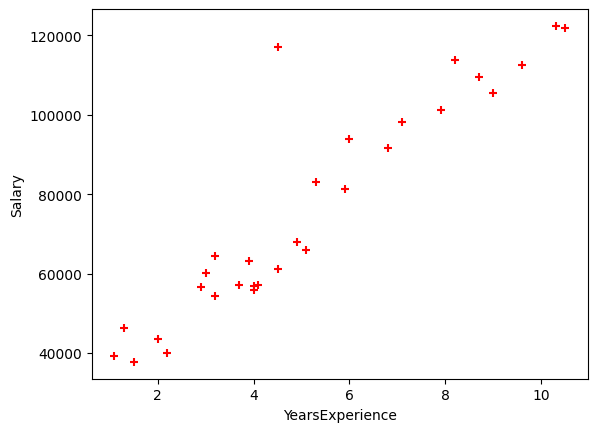

In [36]:
#SALARY

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


df = pd.read_csv('salary.csv')
df.Salary = df.Salary.fillna(df.Salary.median())
df.YearsExperience=df.YearsExperience.fillna(df.YearsExperience.median())

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color='red',marker='+')

reg = linear_model.LinearRegression()
reg.fit(df[['YearsExperience']], df.Salary)


print(reg.predict([[12]]))


In [41]:
#multiple regression

import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

df = pd.read_csv('hiring.csv')

df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

df['experience'] = df['experience'].fillna('zero')

def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0:0}
    return word_dict[word]

df['experience'] = df['experience'].apply(lambda x : convert_to_int(x))

df['experience']=df['experience'].replace(0,df['experience'].median())


reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

print(reg.predict([[2,9,6]]))
print(reg.predict([[12,10,10]]))


[46341.80249281]
[94792.77433975]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:

import pandas as pd
from sklearn import linear_model


df = pd.read_csv('1000_Companies.csv')

df['R&D Spend'].replace(0,df['R&D Spend'].median(),inplace=True)
df['Administration'].replace(0,df['Administration'].median(),inplace=True)
df['Marketing Spend'].replace(0,df['Marketing Spend'].median(),inplace=True)


X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# convert 'State' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)



# create and train
reg = linear_model.LinearRegression()
reg.fit(X, y)


new_data = pd.DataFrame({
    'R&D Spend': [91694.48],
    'Administration': [515841.3],
    'Marketing Spend': [11931.24],
    'State_Florida': [1],  # Florida is represented by 1
    'State_New York': [0],
})


predicted_profit = reg.predict(new_data)
print(predicted_profit)


[214985.23565299]


<ipython-input-45-e6f12a7adf25>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['R&D Spend'].replace(0,df['R&D Spend'].median(),inplace=True)
<ipython-input-45-e6f12a7adf25>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=